<a href="https://colab.research.google.com/github/gabriellfelipe7/AnaliseExploratoria_AverageCostStudentUSA/blob/main/AnaliseExploratoria_AverageCostStudentUSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Average Cost of Undergraduate Student by State USA**
- Gabriel Felipe Machado de Oliveira
- Março de 2023

## **1. Informações do Dataset**

### **1.1. Extração e informações da base**

A base de dados utilizada foi construída a partir de dados da agência National Center for Education Statistics (Centro Nacional de Estatísticas da Educação.) A agência publica anualmente a relação completa das variáveis, para o estudo, reuniu-se dados do ano de 2013 a 2021.

Traz informações relacionadas às universidades e aos estudantes em diveros estados dos Estados Unidos.

A extração foi feita através do site Kaggle. Segue o link para dowload e visualização: https://www.kaggle.com/datasets/bhargavchirumamilla/average-cost-of-undergraduate-student-by-state-usa

### **1.2. Variáveis do dataset**

Há no estudo 6 colunas/variáveis, sendo elas:
- Year: o ano considerado na abordagem dos estudantes;
- State: o estado onde a universdade se localiza;
- Type: o tipo da universidade podendo ser pública ou privada; 
- Length: a duração do curso em anos baseada no tipo de programa utilizado pelo estudante;
- Expense: os tipos de gastos e despesas que o estudante teve durante o tempo de estudo;
- Value: o custo médio das despesasem dólares americanos USD ($).

### **1.3. Tamanho do dataset**

A base de dados extraída possui um total de 6 colunas e 3548 linhas.

## **2. Objetivos**

### **2.1. Introdução** 
O relatório possui como principal objetivo analisar e explorar de maneira descritiva os dados em questão. Para isso, algumas técnicas bem definidas de Visuzalição e Exploração de Dados foram utilizadas.

Busca-se, em última instância, estimar parâmetros e características de toda população de estudantes dos Estados Unidos. 

A fim de amparar e basear todo o projeto, alguns tópicos foram levantados. 

### **2.1. Definições e tópicos de abordagens** 

Seguem abaixo algumas perguntas que serão investigadas no projeto:
- Qual o ano em que os estudantes tiveram maior custo?
- Qual o tipo de faculdade mais comum entre os estudantes da base?
- Quais são as médias de custo dos estudantes em cada estado?
- Qual o estado mais caro para se estudar, considerando a média de custo? 
- Quais são as médias de custo entre estudantes de universidades públicas e particulares. Essa diferença é estatisticamente significativa significativa?
- Cosiderando a duração do curso, calcule as médias de custos entre as possíveis durações e se essa diferença é estatisticamnete significativa.


Além dessas questões, outras ainda podem surgir a partir do desenvolvimento do projeto.

## **3. Extração e limpeza da base de dados**

Nesta etapa, com o auxílio de algumas bibliotecas, focaremos na extração e na limpeza do dataset.

In [1]:
#Bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics as sts
import scipy.stats as sci

In [2]:
#Extração dos dados e visualização
data = pd.read_csv('/content/nces330_20.csv')
display(data)

,Year,State,Type,Length,Expense,Value
0,2013,Alabama,Private,4-year,Fees/Tuition,13983
1,2013,Alabama,Private,4-year,Room/Board,8503
2,2013,Alabama,Public In-State,2-year,Fees/Tuition,4048
3,2013,Alabama,Public In-State,4-year,Fees/Tuition,8073
4,2013,Alabama,Public In-State,4-year,Room/Board,8473
...,...,...,...,...,...,...
3543,2021,Wyoming,Public In-State,2-year,Fees/Tuition,3987
3544,2021,Wyoming,Public In-State,4-year,Room/Board,9799
3545,2021,Wyoming,Public Out-of-State,2-year,Fees/Tuition,9820
3546,2021,Wyoming,Public Out-of-State,4-year,Fees/Tuition,14710


In [3]:
#Verificação dos tipos dos dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3548 entries, 0 to 3547
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     3548 non-null   int64 
 1   State    3548 non-null   object
 2   Type     3548 non-null   object
 3   Length   3548 non-null   object
 4   Expense  3548 non-null   object
 5   Value    3548 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 166.4+ KB


In [4]:
#Tamanho
data.shape

(3548, 6)

In [5]:
#Buscando valores vazios
data.isnull()

,Year,State,Type,Length,Expense,Value
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
3543,False,False,False,False,False,False
3544,False,False,False,False,False,False
3545,False,False,False,False,False,False
3546,False,False,False,False,False,False


In [6]:
#Bucando valores nulos
data.isna()

,Year,State,Type,Length,Expense,Value
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
3543,False,False,False,False,False,False
3544,False,False,False,False,False,False
3545,False,False,False,False,False,False
3546,False,False,False,False,False,False


Não há dados para limpeza, logo, estão prontos para a análise.

## **4. Análise das variáveis** 

### **4.1. Variável: Year**

In [7]:
data_Year = pd.DataFrame(data['Year'])
display(data_Year)

,Year
0,2013
1,2013
2,2013
3,2013
4,2013
...,...
3543,2021
3544,2021
3545,2021
3546,2021


Trata-se, no contexto, de uma variável ordinal. Algumas informações:

In [8]:
#Possíveis valores
display(pd.DataFrame(data = data['Year'].value_counts()))

,Year
2013,403
2014,403
2015,403
2016,403
2017,401
2018,398
2019,396
2020,396
2021,345


<Axes: title={'center': 'Distribuição de Frequências: Year'}, xlabel='Year', ylabel='Frequência'>

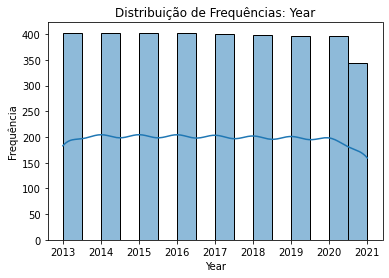

In [9]:
#Histograma de frequências
plt.xlabel('Year')

plt.ylabel('Frequência')
plt.title('Distribuição de Frequências: Year')

sns.histplot(data, x = 'Year', kde = True)

Nota-se que no ano de 2021 os dados diminuíram. Passando de 396 em 2020 para 245 em 2021.

### **4.2. Variável: State**

In [10]:
data_State = pd.DataFrame(data['State'])
display(data_State)

,State
0,Alabama
1,Alabama
2,Alabama
3,Alabama
4,Alabama
...,...
3543,Wyoming
3544,Wyoming
3545,Wyoming
3546,Wyoming


Trata-se de uma variável nominal.

In [11]:
#Possíveis valores
display(pd.DataFrame(data = data['State'].value_counts()))

,State
Alabama,71
Montana,71
New Hampshire,71
New Jersey,71
New Mexico,71
New York,71
North Carolina,71
North Dakota,71
Ohio,71
Oklahoma,71


In [12]:
#Quantidade de valores distintos (estados considerados)
frequencia_estados = pd.DataFrame(data = data['State'].value_counts())
qtd_estados = frequencia_estados.shape[0]

print('Qtd. de estados considerados: {}'.format(qtd_estados))

Qtd. de estados considerados: 51


Na base construída considerou-se 51 estados.

### **4.3. Variável: Type**

In [13]:
data_Type = pd.DataFrame(data['Type'])
display(data_Type)

,Type
0,Private
1,Private
2,Public In-State
3,Public In-State
4,Public In-State
...,...
3543,Public In-State
3544,Public In-State
3545,Public Out-of-State
3546,Public Out-of-State


Trata-se de uma variável qualitativa nominal.

In [14]:
#Possíveis valores
display(pd.DataFrame(data = data['Type'].value_counts()))

,Type
Public Out-of-State,1347
Public In-State,1296
Private,905


<Axes: title={'center': 'Distribuição de Frequências: Type'}, xlabel='Type', ylabel='Frequência'>

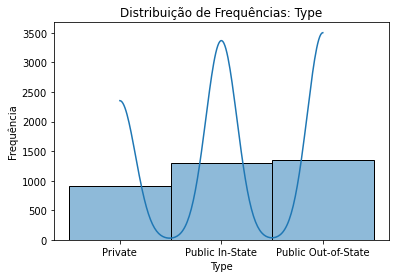

In [15]:
#Histograma de frequências
plt.xlabel('Type')

plt.ylabel('Frequência')
plt.title('Distribuição de Frequências: Type')

sns.histplot(data, x = 'Type', kde = True)

### **4.4. Variável: Length**

In [16]:
data_Length = pd.DataFrame(data['Length'])
display(data_Length)

,Length
0,4-year
1,4-year
2,2-year
3,4-year
4,4-year
...,...
3543,2-year
3544,4-year
3545,2-year
3546,4-year


Trata-se de uma variável qualitativa nominal ou ordinal.

In [17]:
#Possíveis valores
display(pd.DataFrame(data = data['Length'].value_counts()))

,Length
4-year,2672
2-year,876


<Axes: title={'center': 'Distribuição de Frequências: Length'}, xlabel='Legth', ylabel='Frequência'>

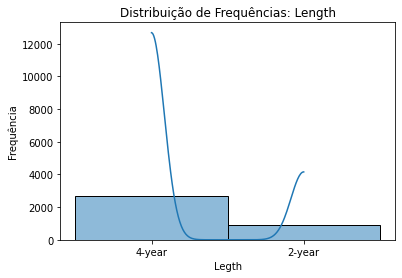

In [18]:
#Histograma de frequências
plt.xlabel('Legth')

plt.ylabel('Frequência')
plt.title('Distribuição de Frequências: Length')

sns.histplot(data, x = 'Length', kde = True)

### **4.5. Variável: Expense**

In [19]:
data_Expense = pd.DataFrame(data['Expense'])
display(data_Expense)

,Expense
0,Fees/Tuition
1,Room/Board
2,Fees/Tuition
3,Fees/Tuition
4,Room/Board
...,...
3543,Fees/Tuition
3544,Room/Board
3545,Fees/Tuition
3546,Fees/Tuition


Trata-se de uma variável qualitativa nominal.

In [20]:
#Possíveis valores
display(pd.DataFrame(data = data['Expense'].value_counts()))

,Expense
Fees/Tuition,2198
Room/Board,1350


<Axes: title={'center': 'Distribuição de Frequências: Expense'}, xlabel='Expense', ylabel='Frequência'>

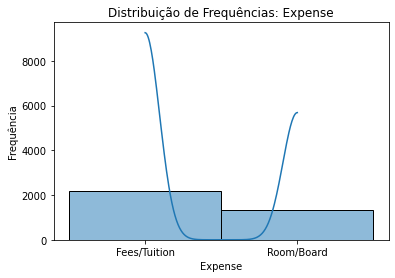

In [21]:
#Histograma de frequências
plt.xlabel('Expense')

plt.ylabel('Frequência')
plt.title('Distribuição de Frequências: Expense')

sns.histplot(data, x = 'Expense', kde = True)

### **4.6. Variável: Value**

In [22]:
data_Value = pd.DataFrame(data['Value'])
display(data_Value)

,Value
0,13983
1,8503
2,4048
3,8073
4,8473
...,...
3543,3987
3544,9799
3545,9820
3546,14710


Trata-se de uma variável quantitativa discreta.

<Axes: title={'center': 'Distribuição de Frequências: Value'}, xlabel='Value', ylabel='Frequência'>

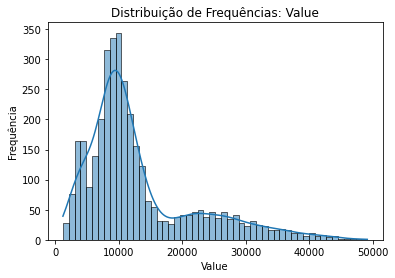

In [23]:
#Histograma de frequências
plt.xlabel('Value')

plt.ylabel('Frequência')
plt.title('Distribuição de Frequências: Value')

sns.histplot(data, x = 'Value', kde = True)

Segue algumas possíveis conclusões da distribuição de frequências da variável "Value":
- Pode-se graficamente inferir uma amostra com distribuição Normal Assimétrica à esquerda;
- Percebe-se que a variável "Value" poderia ser dividida por volta do valor 19000 em duas outras distribuições; 

## **5. Investigação dos tópicos de abordagem**

- Qual o ano em que os estudantes tiveram maior custo?
- Qual o tipo de faculdade mais comum entre os estudantes da base?
- Quais são as médias de custo dos estudantes em cada estado? Qual o top 5?
- Quais são as médias de custo entre estudantes de universidades públicas e particulares. Essa diferença é estatisticamente significativa significativa?
- Cosiderando a duração do curso, calcule as médias de custos entre as possíveis durações e se essa diferença é estatisticamnete significativa.
- Mostre um gráfico de barras de tipos de faculdade por ano e suas médias.
- Investigue sorrelações entre as variáveis.

### **5.1. Qual o ano em que os estudantes tiveram maior custo?**

In [24]:
#Tabela de médias de custo por ano ordenadas de forma decrescente
custo_por_ano = data.groupby(['Year']).mean('Value')
custo_por_ano = custo_por_ano.sort_values(['Value'], ascending = False)
custo_por_ano = custo_por_ano.reset_index()
display(custo_por_ano)

,Year,Value
0,2021,15150.327536
1,2020,14277.659091
2,2019,13905.750000
3,2018,13453.030151
4,2017,12980.147132
5,2016,12546.004963
6,2015,12119.404467
7,2014,11781.503722
8,2013,11383.143921


<Axes: title={'center': 'Gráfico de Colunas - Value x Year'}, xlabel='Year', ylabel='Value'>

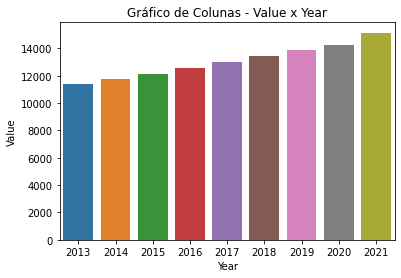

In [25]:
#Criação de gráfico de barras
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Gráfico de Colunas - Value x Year')

sns.barplot(data = custo_por_ano, x = 'Year' , y = "Value")

**O ano de 2021 foi o ano com maior custo para os estudantes.**

### **5.2. Qual o tipo de faculdade mais comum entre os estudantes da base?**

In [26]:
#Tabela de frqêucia de gastos
gasto_mais_comum = pd.DataFrame(data['Type'].value_counts())
gasto_mais_comum.sort_values(['Type'], ascending = True)
display(gasto_mais_comum)

,Type
Public Out-of-State,1347
Public In-State,1296
Private,905


**O tipo de faculdade mais comum na base de dados é o "Publico Out-of-State"**

### **5.3. Quais são as médias de custo dos estudantes em cada estado? Qual o top 5?**

In [27]:
#Tabela de médias de custos dos estudantes em cada estado
media_custo_por_estado = data[['State', 'Value']].groupby(['State']).mean('Value')
media_custo_por_estado = media_custo_por_estado.sort_values(['Value'], ascending = False)
display(media_custo_por_estado)

,Value
State,
District of Columbia,18880.200000
Vermont,18596.492958
Connecticut,17435.211268
Massachusetts,17282.098592
Rhode Island,16701.521127
New Hampshire,16560.591549
Pennsylvania,16368.957746
New Jersey,15858.788732
Oregon,15533.436620


In [28]:
#Top 5 faculdades com mais despesas
top_5_custo = media_custo_por_estado.head()
display(top_5_custo)

,Value
State,
District of Columbia,18880.200000
Vermont,18596.492958
Connecticut,17435.211268
Massachusetts,17282.098592
Rhode Island,16701.521127


In [29]:
#Alterando o índice
top_5_custo = top_5_custo.reset_index()

<Axes: title={'center': 'Gráfico de Colunas - Value x State'}, xlabel='State', ylabel='Value'>

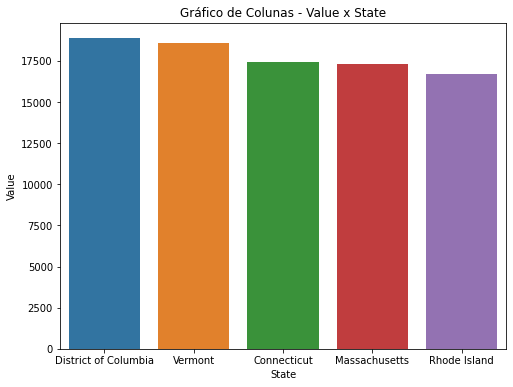

In [30]:
#Gráfico de Colunas
fig = plt.figure(figsize=(8, 6))
plt.xlabel('State')
plt.ylabel('Value')
plt.title('Gráfico de Colunas - Value x State')

sns.barplot(data = top_5_custo, x = 'State' , y = "Value")

**Os estados que mais exigem gastos nos Estados Unidos são:**
- District of Columbia	
- Vermont	
- Connecticut	
- Massachusetts	
- Rhode Island

### **5.4. Quais são as médias de custo entre estudantes de universidades públicas e particulares. Essa diferença é estatisticamente significativa significativa?** 

#### **5.4.1. Análise inicial e conjecturas**

In [31]:
#Seperação das bases
valores_publicas1 = data[data['Type'] == 'Public Out-of-State']
valores_publicas2 = data[data['Type'] == 'Public In-State']
valores_particulares = data[data['Type'] == 'Private']

In [32]:
#Unindo as públicas
valores_publicas = pd.concat([valores_publicas1, valores_publicas2])
print(valores_publicas1.shape)
print(valores_publicas2.shape)
print('-'*25)
print('Base de Publica:',valores_publicas.shape)
print('Base de Privada:',valores_particulares.shape)

(1347, 6)
(1296, 6)
-------------------------
Base de Publica: (2643, 6)
Base de Privada: (905, 6)


Agora, as distribuições dos custos entre as faculdades públicas e particulares podem ser vistas:

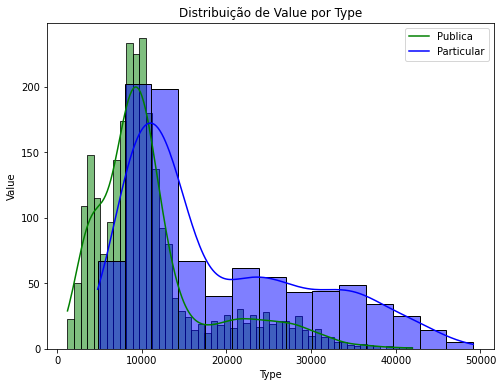

In [33]:
fig = plt.figure(figsize=(8, 6))
plt.xlabel('Type')
plt.ylabel('Value')
plt.title('Distribuição de Value por Type')
sns.histplot(data=valores_publicas, x="Value", kde=True, color='green')
sns.histplot(data=valores_particulares, x="Value", kde=True, color='blue')
plt.legend(labels=["Publica","Particular"])

Algumas observações e possíveis conclusões:
- Ambas possuem uma distribuição semelhante à Normal com caudas alongadas à direita;
- Embora as distribuições sejam semelhantes, é visível que estudantes de faculdades particulares gastem mais;
- Na amostra, há mais estudantes de faculdades públicas do que particulres.

#### **5.4.2. Cálculo das médias amostrais**

In [52]:
x_barra_publica = round(np.mean(valores_publicas['Value']), 2)
x_barra_particulares = round(np.mean(valores_particulares['Value']), 2)

print(f'-> Média amostral do custo dos estudantes de públicas: {x_barra_publica}')
print(f'-> Média amostral do custo dos estudantes de públicas: {x_barra_particulares}')

-> Média amostral do custo dos estudantes de públicas: 11047.62
-> Média amostral do custo dos estudantes de públicas: 18810.48


#### **5.4.3. Testanto a normalidade**

Antes do teste de hipóteses, será necessário testarmos se os dados provém de uma distribição normal. Para isso, será utilizado o teste de Shapiro-Wilk.

In [46]:
def teste_norm_shapiro(dados):
  shapiro_test = sci.shapiro(dados)
  stat = shapiro_test.statistic
  p_valor = shapiro_test.pvalue

  if p_valor > 0.05:
    print(f'**Dado um nível de significância de 5%, os dados nos dão evidências de que seguem uma distirbuição Normal**') 
    print(f'-> Estatística = {stat}') 
    print(f'-> p_valor = {p_valor}')
  else:
    print(f'**Dado um nível de significância de 5%, os dados nos dão evidências de que não seguem uma distirbuição Normal**') 
    print(f'-> Estatística = {stat}') 
    print(f'-> p_valor = {p_valor}')

In [47]:
#Teste de Shapiro Wilk - valores_publicas
teste_norm_shapiro(valores_publicas['Value'])

**Dado um nível de significância de 5%, os dados nos dão evidências de que não seguem uma distirbuição Normal**
-> Estatística = 0.8481462001800537
-> p_valor = 8.407790785948902e-45


In [48]:
#Teste de Shapiro Wilk - valores_particulares
teste_norm_shapiro(valores_particulares['Value'])

**Dado um nível de significância de 5%, os dados nos dão evidências de que não seguem uma distirbuição Normal**
-> Estatística = 0.8814332485198975
-> p_valor = 1.0403559247812924e-25


Pelo teste de Shapiro, conclui-se ao nível de confiança de 95%, os dados não seguem a distribuição normal. Partiremos então, para **testes não-paramétricos**.